In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


df=pd.read_csv('../../DATASETS/AHOGADOS/CSV/historico_inc_est_meteo_codigos_test.csv',sep='|',error_bad_lines=False)

# METODO 1 - Recursive Feature Elimination

In [2]:
df_rfe=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'Costa']]

In [3]:
column_means = df_rfe.drop(['Mortal'],1).mean()
df_rfe = df_rfe.fillna(column_means)

In [4]:
X=df_rfe[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa']].values
y=df_rfe[['Mortal']].values

In [5]:
model = LogisticRegression()

In [6]:
rfe = RFE(model, 3)

In [7]:
rfe = rfe.fit(X, y)

C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\sklearn\linear

In [8]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True  True  True]
[ 5  2  7  4  3  6  9 10  8  1  1  1]


# METODO 2 - Feature Importance

In [9]:
df_xtra=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'Costa']]

column_means = df_xtra.drop(['Mortal'],1).mean()
df_xtra = df_xtra.fillna(column_means)

X_xtra=df_xtra[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa']].values
y_xtra=df_xtra[['Mortal']].values

In [10]:
model = ExtraTreesClassifier()
model.fit(X_xtra, y_xtra)
# display the relative importance of each attribute
print(df_xtra.drop(['Mortal'],1).columns)
print(model.feature_importances_)

Index(['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion',
       'Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa'],
      dtype='object')
[0.07582097 0.23222876 0.0851963  0.0925316  0.08997003 0.0468918
 0.09454903 0.09182283 0.08637471 0.04316977 0.04615282 0.01529137]


C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# METODO 3 - Linear Regression Feature Importance

In [11]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [12]:
df_lreg=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'Costa']]

column_means = df_lreg.drop(['Mortal'],1).mean()
df_lreg = df_lreg.fillna(column_means)

X_lreg=df_lreg[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa']].values
y_lreg=df_lreg['Mortal'].values

In [13]:
X_lreg.shape

(5468, 12)

In [14]:
y_lreg.shape

(5468,)

In [15]:
model = LinearRegression()

In [16]:
# fit the model
model.fit(X_lreg, y_lreg)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# get importance
importance = model.coef_

Feature: 0, Score: -0.00669
Feature: 1, Score: 0.00751
Feature: 2, Score: -0.01640
Feature: 3, Score: 0.01314
Feature: 4, Score: 0.00123
Feature: 5, Score: -0.00289
Feature: 6, Score: -0.00022
Feature: 7, Score: 0.00012
Feature: 8, Score: -0.00314
Feature: 9, Score: -0.13323
Feature: 10, Score: 0.02294
Feature: 11, Score: -0.11921


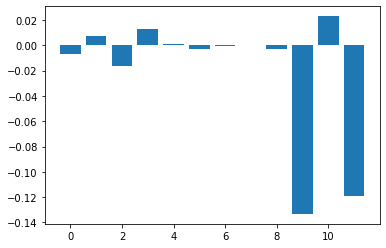

In [18]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# METODO 4 - Decision Tree Feature Importance

### 4.1-CART Regression Feature Importance

In [19]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [20]:
df_tree=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'Costa']]

column_means = df_tree.drop(['Mortal'],1).mean()
df_tree = df_tree.fillna(column_means)

X_tree=df_tree[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa']].values
y_tree=df_tree['Mortal'].values

In [21]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_tree, y_tree)
# get importance
importance = model.feature_importances_

Feature: 0, Score: 0.04597
Feature: 1, Score: 0.29447
Feature: 2, Score: 0.07955
Feature: 3, Score: 0.10191
Feature: 4, Score: 0.10228
Feature: 5, Score: 0.02579
Feature: 6, Score: 0.10753
Feature: 7, Score: 0.10584
Feature: 8, Score: 0.07014
Feature: 9, Score: 0.03209
Feature: 10, Score: 0.02136
Feature: 11, Score: 0.01307


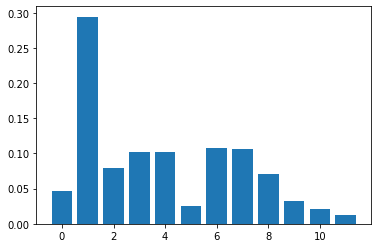

In [22]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### 4.2-CART Classification Feature Importance

In [23]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [24]:
df_tree2=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'Costa']]

column_means = df_tree2.drop(['Mortal'],1).mean()
df_tree2 = df_tree2.fillna(column_means)

X_tree2=df_tree2[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa']].values
y_tree2=df_tree2['Mortal'].values

In [25]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_tree2, y_tree2)
# get importance
importance = model.feature_importances_

Feature: 0, Score: 0.05356
Feature: 1, Score: 0.28688
Feature: 2, Score: 0.08147
Feature: 3, Score: 0.09652
Feature: 4, Score: 0.09986
Feature: 5, Score: 0.02929
Feature: 6, Score: 0.10205
Feature: 7, Score: 0.10979
Feature: 8, Score: 0.06944
Feature: 9, Score: 0.03004
Feature: 10, Score: 0.02796
Feature: 11, Score: 0.01315


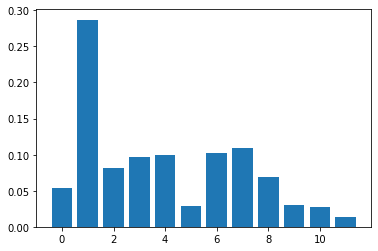

In [26]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# METODO 5 - Random Forest Feature Importance

### 5.1-Random Forest Regression Feature Importance

In [27]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [28]:
df_forest=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'Costa']]

column_means = df_forest.drop(['Mortal'],1).mean()
df_forest = df_forest.fillna(column_means)

X_forest=df_forest[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa']].values
y_forest=df_forest['Mortal'].values

In [29]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_forest, y_forest)
# get importance
importance = model.feature_importances_

C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.04309
Feature: 1, Score: 0.30231
Feature: 2, Score: 0.07335
Feature: 3, Score: 0.08440
Feature: 4, Score: 0.09242
Feature: 5, Score: 0.03177
Feature: 6, Score: 0.10918
Feature: 7, Score: 0.11118
Feature: 8, Score: 0.07310
Feature: 9, Score: 0.02937
Feature: 10, Score: 0.03436
Feature: 11, Score: 0.01548


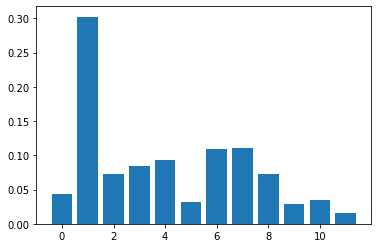

In [30]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### 5.2-Random Forest Classification Feature Importance

In [31]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [32]:
df_forest2=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'Costa']]

column_means = df_forest2.drop(['Mortal'],1).mean()
df_forest2 = df_forest2.fillna(column_means)

X_forest2=df_forest2[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa']].values
y_forest2=df_forest2['Mortal'].values

In [33]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_forest2, y_forest2)
# get importance
importance = model.feature_importances_

C:\Users\Luis Miguel Garay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.04548
Feature: 1, Score: 0.27599
Feature: 2, Score: 0.08722
Feature: 3, Score: 0.09763
Feature: 4, Score: 0.09549
Feature: 5, Score: 0.03558
Feature: 6, Score: 0.09521
Feature: 7, Score: 0.10618
Feature: 8, Score: 0.07375
Feature: 9, Score: 0.03861
Feature: 10, Score: 0.03645
Feature: 11, Score: 0.01241


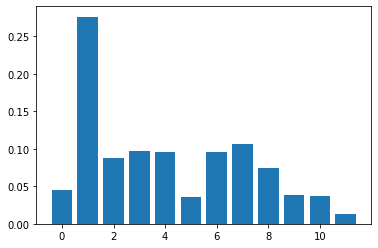

In [34]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# METODO 5 - Feature Selection with Importance

In [35]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [36]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [37]:
df_FSI=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'Costa']]

column_means = df_FSI.drop(['Mortal'],1).mean()
df_FSI = df_FSI.fillna(column_means)

X=df_FSI[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Costa']].values
y=df_FSI['Mortal'].values

In [38]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.70
